In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from numpy import isnan
#from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree
from sklearn.decomposition import KernelPCA
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [2]:
#load the dataset
data=pd.read_excel("D:\Techmiya\PRoject\Datasets\house.xlsx")

In [3]:
data.isnull().sum()

City                   0
Price                  0
Area                   0
Location               0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0


In [4]:
data.head()

,City,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,Banglore,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,Banglore,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,Banglore,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,Banglore,8358000,1675,Doddanekundi,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,Banglore,6845000,1670,Kengeri,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [5]:
data=data[['City','Price','Area','Location','No. of Bedrooms','LiftAvailable','Resale']]
data.rename(columns = {'No. of Bedrooms':'NoofBedrooms'}, inplace = True)

In [6]:
data_cat=data.select_dtypes(exclude=np.number)
data_num=data.select_dtypes(np.number)
data_cat=data_cat.reset_index()

In [7]:
ss=StandardScaler()
data_num_scaled=pd.DataFrame(ss.fit_transform(data_num),columns=data_num.columns)
data_num_scaled=data_num_scaled.reset_index()
data_num_scaled.head()

,index,Price,Area,NoofBedrooms,LiftAvailable,Resale
0,0,1.544265,2.590086,2.064437,-1.696987,-0.451777
1,1,-0.105227,-0.437165,-0.743045,-1.696987,-0.451777
2,2,-0.330659,-0.260410,-0.743045,-1.696987,-0.451777
3,3,-0.070166,0.393845,0.660696,-1.696987,-0.451777
4,4,-0.183031,0.387250,0.660696,-1.696987,-0.451777


In [8]:
data_scaled=pd.concat([data_num_scaled,data_cat],axis=1).drop('index',axis=1)
data_scaled.head()

,Price,Area,NoofBedrooms,LiftAvailable,Resale,City,Location
0,1.544265,2.590086,2.064437,-1.696987,-0.451777,Banglore,JP Nagar Phase 1
1,-0.105227,-0.437165,-0.743045,-1.696987,-0.451777,Banglore,Dasarahalli on Tumkur Road
2,-0.330659,-0.260410,-0.743045,-1.696987,-0.451777,Banglore,Kannur on Thanisandra Main Road
3,-0.070166,0.393845,0.660696,-1.696987,-0.451777,Banglore,Doddanekundi
4,-0.183031,0.387250,0.660696,-1.696987,-0.451777,Banglore,Kengeri


In [9]:
# Reference Table For Displaying Reason for Selecting
data_encoded_refernce=pd.get_dummies(data,columns=['Location','City'])
data_encoded_refernce.head()

,Price,Area,NoofBedrooms,LiftAvailable,Resale,Location_200 Feet Radial Road,Location_5th Phase,Location_5th Stage BEML Layout,Location_5th Stage Raja Rajeshwari Nagar,Location_6th phase jp nagar,...,Location_raghunathpur,Location_salt lake sec iii,Location_sarjapura attibele road,Location_shalimar,Location_south dum dum,Location_tambaram east,Location_tambaram west,City_Banglore,City_Chennai,City_Kolkata
0,30000000,3340,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,7888000,1045,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4866000,1179,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8358000,1675,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6845000,1670,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
data_encoded_scaled=pd.get_dummies(data_scaled,columns=['Location','City'])
data_encoded_scaled.head()

,Price,Area,NoofBedrooms,LiftAvailable,Resale,Location_200 Feet Radial Road,Location_5th Phase,Location_5th Stage BEML Layout,Location_5th Stage Raja Rajeshwari Nagar,Location_6th phase jp nagar,...,Location_raghunathpur,Location_salt lake sec iii,Location_sarjapura attibele road,Location_shalimar,Location_south dum dum,Location_tambaram east,Location_tambaram west,City_Banglore,City_Chennai,City_Kolkata
0,1.544265,2.590086,2.064437,-1.696987,-0.451777,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.105227,-0.437165,-0.743045,-1.696987,-0.451777,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.330659,-0.260410,-0.743045,-1.696987,-0.451777,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,-0.070166,0.393845,0.660696,-1.696987,-0.451777,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.183031,0.387250,0.660696,-1.696987,-0.451777,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Hierarchical Clustering

In [11]:
d1 = data_encoded_scaled.copy()

In [12]:
data_cluster=data_encoded_refernce.copy()

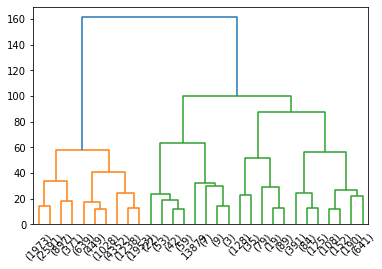

In [13]:
cls=d1[['Area','Price']]
mergings=linkage(cls,method='ward',metric='euclidean')
dendrogram(mergings,truncate_mode='lastp')
plt.show()

In [14]:
cluster=cut_tree(mergings,n_clusters=3)

In [15]:
cluster_cut = pd.Series(cut_tree(mergings,n_clusters=3).reshape(-1))

In [16]:
cluster_cut.value_counts()

1    15491
0     2041
2      196
dtype: int64

In [17]:
d1['cluster']=cluster

In [18]:
data_cluster['cluster']=cluster

In [19]:
ssd = []
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    ssd.append(kmeans.inertia_)

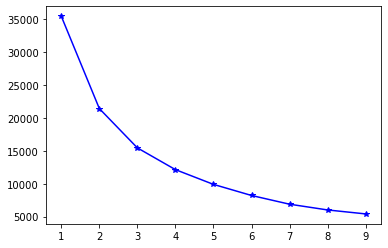

In [20]:
plt.plot(range(1,10),ssd,marker='*',color='b')

In [21]:
from sklearn.metrics import silhouette_score

score = []
for k in range(2,10):
    kmeans = KMeans(n_clusters=k,random_state=4)
    kmeans.fit(cls)
    labels = kmeans.labels_
    ss = silhouette_score(d1,labels)
    score.append(ss)

In [22]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_encoded_refernce)
data_cluster['kmeans_cluster']=cluster_kmeans
data_cluster.head()

,Price,Area,NoofBedrooms,LiftAvailable,Resale,Location_200 Feet Radial Road,Location_5th Phase,Location_5th Stage BEML Layout,Location_5th Stage Raja Rajeshwari Nagar,Location_6th phase jp nagar,...,Location_sarjapura attibele road,Location_shalimar,Location_south dum dum,Location_tambaram east,Location_tambaram west,City_Banglore,City_Chennai,City_Kolkata,cluster,kmeans_cluster
0,30000000,3340,4,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
1,7888000,1045,2,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,4866000,1179,2,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,8358000,1675,3,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,6845000,1670,3,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [23]:
df3 = data_cluster.iloc[:,[0,1,2,802]]

In [24]:
df4 = df3.groupby(by='kmeans_cluster')
df4[['Price','Area','NoofBedrooms']].mean()

,Price,Area,NoofBedrooms
kmeans_cluster,,,
0,6.397113e+06,1305.528667,2.491536
1,9.116175e+07,2950.239044,3.115538
2,2.976011e+07,1959.245546,2.889233


In [25]:
def cluster_plot(data, nclusters):
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    X = data.copy()
    cols = list(X.columns)
    km = KMeans(n_clusters=nclusters, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
    y_km = km.fit_predict(X)


    # Visualize it:
    plt.figure(figsize=(8, 6))
    plt.scatter(X.iloc[:,0], X.iloc[:,1], c=km.labels_.astype(float))

    # plot the centroids
    plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=250, marker='*', c='red', label='centroids')
    plt.xlabel(cols[0])
    plt.ylabel(cols[1])
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

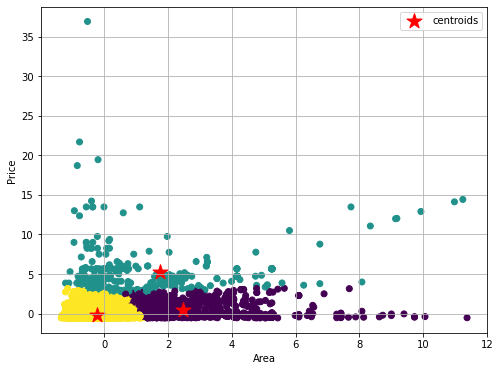

In [26]:
cluster_plot(cls,3)

In [27]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.25,min_samples=4)

dbscan.fit(cls)

pd.Series(dbscan.labels_).value_counts()

 0     17347
-1       139
 17       37
 6        29
 11       29
 16       22
 7        20
 3        15
 2        15
 1        14
 10       13
 4        10
 5         9
 8         5
 9         5
 18        4
 12        4
 13        4
 15        4
 14        3
dtype: int64

In [28]:
lbl = pd.Series(dbscan.labels_)
lbl.loc[lbl >= 0] = 0
lbl.value_counts()

 0    17589
-1      139
dtype: int64

# PCA

In [29]:
d2 = data_num_scaled.drop(['index'],axis=1)

In [30]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(d2)
print(np.cumsum(pca.explained_variance_ratio_*100))

[ 37.33122484  59.36868324  77.43385916  94.30102244 100.        ]


In [31]:
pca=PCA(n_components=2)
pca.fit_transform(d2)

print(pca.explained_variance_ratio_*100)

[37.33122484 22.0374584 ]


In [32]:
components = pca.components_.T
pd.DataFrame(components,index=d2.columns,columns=['PC1','PC2'])

,PC1,PC2
Price,0.392317,0.233543
Area,0.661569,0.074648
NoofBedrooms,0.627591,-0.043161
LiftAvailable,0.100452,-0.668670
Resale,0.066725,-0.700645


In [33]:
data_pca=pd.DataFrame(pca.transform(d2),columns=['PC1','PC2'])
data_pca

,PC1,PC2
0,3.414374,1.916153
1,-0.997437,1.426122
2,-0.968942,1.386668
3,0.447064,1.435756
4,0.398422,1.408905
...,...,...
17723,0.460828,-0.156895
17724,0.317362,-0.089892
17725,-1.006977,-0.127775
17726,-0.947740,-0.150191


In [34]:
model=KMeans(n_clusters=3,random_state=10)
cluster_kmeans=model.fit_predict(data_pca)
data_pca['km_cluster_pca']=cluster_kmeans

Recommendation Systems
Content Based Filter

In [35]:
model=NearestNeighbors(metric='cosine')
model.fit(data_encoded_scaled)

NearestNeighbors(metric='cosine')

In [36]:
selected=7
data_encoded_scaled.iloc[selected].values[0:8]

array([-0.16363622,  0.08122723,  0.66069598, -1.69698745, -0.45177696,
        0.        ,  0.        ,  0.        ])

In [37]:
dist,index=model.kneighbors(data_encoded_scaled.iloc[selected].values.reshape(1,-1),n_neighbors=6)
index

array([[  7,  25,  45, 167, 171, 170]], dtype=int64)

In [38]:
suggest=[]
for x in index:
    suggest.append(x)
suggest

[array([  7,  25,  45, 167, 171, 170], dtype=int64)]

In [39]:
# Apartment user showed intrest in
r=data_encoded_refernce.iloc[[selected]][data_encoded_refernce.iloc[[selected]]>0].dropna(axis=1)
r

,Price,Area,NoofBedrooms,LiftAvailable,Location_Ramamurthy Nagar,City_Banglore
7,7105000,1438,3,1,1,1


In [40]:
# Similar Reccomendations
col=r.columns
for x in index:
    suggestions=data_encoded_refernce.iloc[list(x)][col]
suggestions

,Price,Area,NoofBedrooms,LiftAvailable,Location_Ramamurthy Nagar,City_Banglore
7,7105000,1438,3,1,1,1
25,7105000,1438,3,1,1,1
45,7105000,1438,3,1,1,1
167,6973999,1409,3,1,1,1
171,6761000,1362,3,1,1,1
170,6720999,1353,3,1,1,1


In [41]:
data_encoded_scaled.iloc[selected].values[0:8]

dist,index=model.kneighbors(data_encoded_scaled.iloc[selected].values.reshape(1,-1),n_neighbors=6)
index
suggest=[]
for x in index:
    suggest.append(x)
suggest

[array([  7,  25,  45, 167, 171, 170], dtype=int64)]

In [42]:
# Apartment user showed intrest in
r=data_encoded_refernce.iloc[[selected]][data_encoded_refernce.iloc[[selected]]>0].dropna(axis=1)
r

,Price,Area,NoofBedrooms,LiftAvailable,Location_Ramamurthy Nagar,City_Banglore
7,7105000,1438,3,1,1,1


In [43]:
# Similar Reccomendations
col=r.columns
for x in index:
    suggestions=data_encoded_refernce.iloc[list(x)][col]
suggestions

,Price,Area,NoofBedrooms,LiftAvailable,Location_Ramamurthy Nagar,City_Banglore
7,7105000,1438,3,1,1,1
25,7105000,1438,3,1,1,1
45,7105000,1438,3,1,1,1
167,6973999,1409,3,1,1,1
171,6761000,1362,3,1,1,1
170,6720999,1353,3,1,1,1


In [46]:
selected=145
(data_encoded_scaled.iloc[:0]>= selected).values[0:8]

array([], shape=(0, 801), dtype=bool)

In [47]:
dist,index=model.kneighbors(data_encoded_scaled.iloc[selected].values.reshape(1,-1),n_neighbors=6)
index

array([[ 145,  148, 1827, 1830,  152,  150]], dtype=int64)

In [48]:
# Similar Reccomendations
col=r.columns
for x in index:
    suggestions=data_encoded_refernce.iloc[list(x)][col]
suggestions

,Price,Area,NoofBedrooms,LiftAvailable,Location_Ramamurthy Nagar,City_Banglore
145,6736000,1350,2,1,0,1
148,6611000,1325,2,1,0,1
1827,6061000,1350,2,1,0,1
1830,5949000,1325,2,1,0,1
152,6487000,1300,2,1,0,1
150,6437000,1290,2,1,0,1


In [49]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [50]:
indices=pickle.load(open('model.pkl','rb'))

In [51]:
df=data_encoded_refernce
df

,Price,Area,NoofBedrooms,LiftAvailable,Resale,Location_200 Feet Radial Road,Location_5th Phase,Location_5th Stage BEML Layout,Location_5th Stage Raja Rajeshwari Nagar,Location_6th phase jp nagar,...,Location_raghunathpur,Location_salt lake sec iii,Location_sarjapura attibele road,Location_shalimar,Location_south dum dum,Location_tambaram east,Location_tambaram west,City_Banglore,City_Chennai,City_Kolkata
0,30000000,3340,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,7888000,1045,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4866000,1179,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8358000,1675,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,6845000,1670,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17723,4208000,1570,3,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17724,10100000,1208,3,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17725,6669000,815,2,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17726,4608000,952,2,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [52]:
def build_chart(genre):
    df = indices[indices['Price'] == genre]
    qualified=df[['Area','Price','LiftAvailable','Resale','Location']]
    qualified=qualified.reset_index()
    result={}
    result = qualified.head(10)
    
    return result

In [55]:
build_chart(14)

TypeError: 'NearestNeighbors' object is not subscriptable